In [5]:
# Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
from scipy import stats

%matplotlib inline

In [4]:
!pip install imblearn

     ------------------------------------ 235.6/235.6 kB 657.1 kB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
df = pd.read_csv("C:/Users/user.DESKTOP-OMQ89VA/Downloads/bank-additional-full.csv/bank-additional-full.csv", delimiter=';')

In [7]:
# Converting categorical into boolean using get_dummies 
# Getting the predicted values in terms of 0 and 1
Y = (df['y'] == 'yes')*1

In [8]:
# Looking at statistics of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# Looking at all the columns in the dataset.
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
# Dropping y from the original dataset as we have read it seperately
df.drop('y', axis = 1, inplace = True)

In [11]:
# First five rows of the dataset after dropping y from the dataset
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0           1.1          93.994

C:\Users\user.DESKTOP-OMQ89VA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

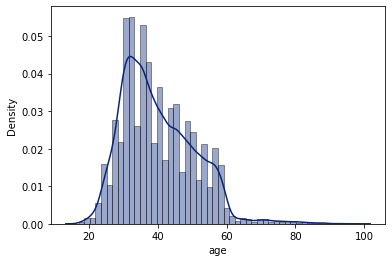

In [12]:
# Visaulizing how age is distributed in the dataset
sns.distplot(df['age'], hist = True, color = "#07247D", hist_kws = {'edgecolor':'black'})

[Text(0, 0, 'basic.4y'),
 Text(1, 0, 'high.school'),
 Text(2, 0, 'basic.6y'),
 Text(3, 0, 'basic.9y'),
 Text(4, 0, 'professional.course'),
 Text(5, 0, 'unknown'),
 Text(6, 0, 'university.degree'),
 Text(7, 0, 'illiterate')]

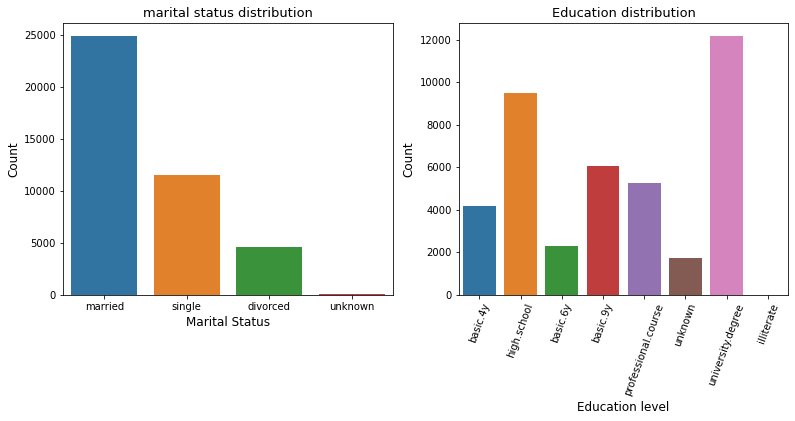

In [13]:
# Visualizing how Maritial Status and Education is distributed in the dataset. 
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# First plot for marital status
sns.countplot(x = "marital", data = df, ax = ax1)
ax1.set_title("marital status distribution", fontsize = 13)
ax1.set_xlabel("Marital Status", fontsize = 12)
ax1.set_ylabel("Count", fontsize = 12)

# Second plot for Education distribution
sns.countplot(x = "education", data = df, ax = ax2)
ax2.set_title("Education distribution", fontsize = 13)
ax2.set_xlabel("Education level", fontsize = 12)
ax2.set_ylabel("Count", fontsize = 12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)

Text(0.5, 1.0, 'Job Count Distribution')

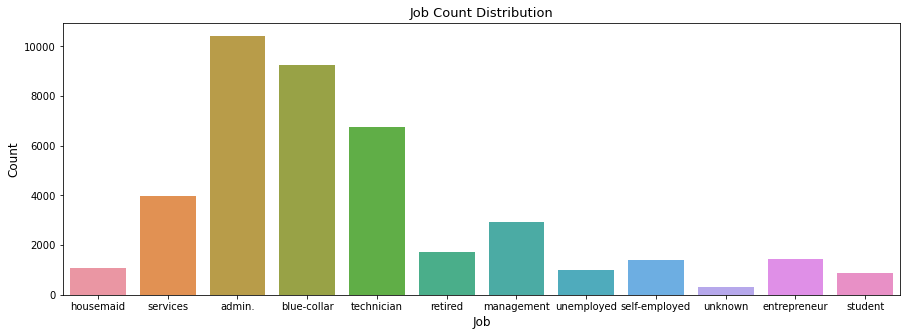

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x = "job", data = df)
ax.set_xlabel('Job', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_title("Job Count Distribution", fontsize = 13)

Text(0, 0.5, 'Count')

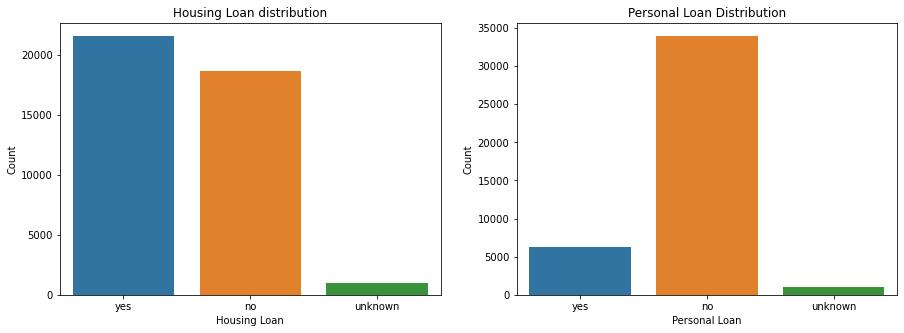

In [15]:
# Housing loan data distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sns.countplot(x = "housing", data = df, ax = ax1, order = ['yes', 'no', 'unknown'])
ax1.set_title("Housing Loan distribution")
ax1.set_xlabel("Housing Loan")
ax1.set_ylabel("Count")

# Personal loan data distribution
sns.countplot(x = "loan", data = df, ax = ax2, order = ['yes', 'no', 'unknown'])
ax2.set_title("Personal Loan Distribution")
ax2.set_xlabel("Personal Loan")
ax2.set_ylabel("Count")

In [16]:
#Credit Defaulter-
print("Number of people with credit default: ", df[df['default'] == 'yes']['default'].count())
print("Number of people with no credit default: ", df[df['default'] == 'no']['default'].count())
print("Number of people who's credit default is unknown: ", df[df['default'] == 'unknown']['default'].count())

Number of people with credit default:  3
Number of people with no credit default:  32588
Number of people who's credit default is unknown:  8597


In [17]:
#Housing Loan-
print("Number of people with Housing loan: ", df[df['housing'] == 'yes']['housing'].count())
print("Number of people with no Housing loan: ", df[df['housing'] == 'no']['housing'].count())
print("Number of people who's Housing loan is unknown: ", df[df['housing'] == 'unknown']['housing'].count())

Number of people with Housing loan:  21576
Number of people with no Housing loan:  18622
Number of people who's Housing loan is unknown:  990


In [18]:
#Personal Loan-
print("Number of people with Personal loan: ", df[df['loan'] == 'yes']['loan'].count())
print("Number of people with no Personal loan: ", df[df['loan'] == 'no']['loan'].count())
print("Number of people who's Personal loan is unknown: ", df[df['loan'] == 'unknown']['loan'].count())

Number of people with Personal loan:  6248
Number of people with no Personal loan:  33950
Number of people who's Personal loan is unknown:  990


C:\Users\user.DESKTOP-OMQ89VA\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\user.DESKTOP-OMQ89VA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Call Duration vs Count')

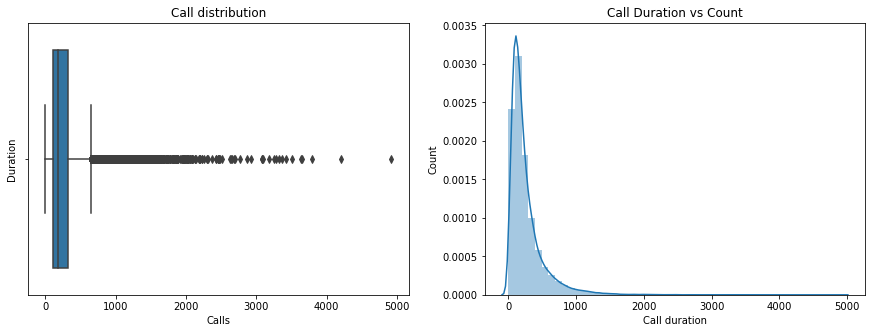

In [19]:
#Visualisation related to Duration-
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.boxplot(x = "duration", data = df, orient = 'v', ax = ax1)
ax1.set_xlabel("Calls")
ax1.set_ylabel("Duration")
ax1.set_title("Call distribution")

sns.distplot(df['duration'], ax = ax2)
ax2.set_xlabel("Call duration")
ax2.set_ylabel("Count")
ax2.set_title("Call Duration vs Count")

In [20]:
min_duration = df['duration'].min()
max_duration = df['duration'].max()
median_duration = df['duration'].mean()
standard_dev_duration = df["duration"].std()

print("Min call duration: ", min_duration)
print("Max call duration: ", max_duration)
print("Median call duration: ", round(median_duration, 2))
print("Standard diveation in call duration: ", round(standard_dev_duration, 2))

Min call duration:  0
Max call duration:  4918
Median call duration:  258.29
Standard diveation in call duration:  259.28


In [22]:
first_quartile = df['duration'].quantile(q = 0.25)
second_quartile = df['duration'].quantile(q = 0.50)
third_quartile = df['duration'].quantile(q = 0.75)
fourth_quartile = df['duration'].quantile(q = 1)
IRQ = third_quartile - second_quartile

print("Second Quartile: ", second_quartile)
print("Third Quartile: ", third_quartile)
print("Inter quartile range(range within which most data is present): ",IRQ)

Second Quartile:  180.0
Third Quartile:  319.0
Inter quartile range(range within which most data is present):  139.0


C:\Users\user.DESKTOP-OMQ89VA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Calls made on Days of the week')

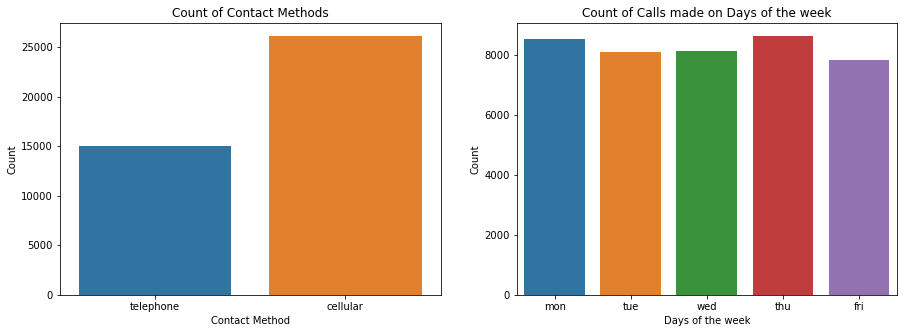

In [23]:
# For contact and Days of the week
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = 'contact', data = df, ax = ax1)
ax1.set_xlabel("Contact Method")
ax1.set_ylabel("Count")
ax1.set_title("Count of Contact Methods")

sns.countplot(df['day_of_week'], ax = ax2)
ax2.set_xlabel("Days of the week")
ax2.set_ylabel("Count")
ax2.set_title("Count of Calls made on Days of the week")

Text(0.5, 1.0, 'Count of contacts made in each month')

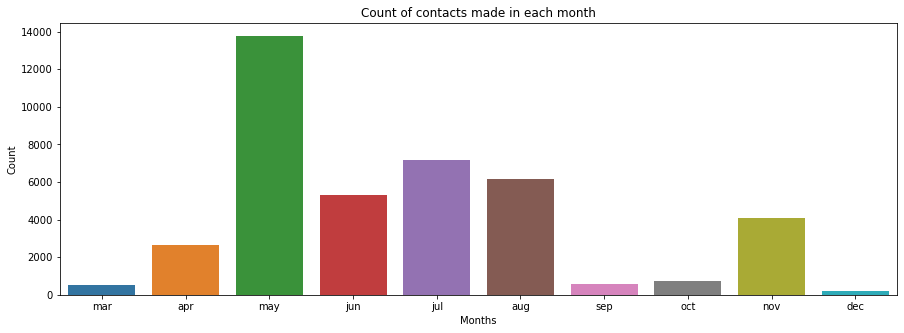

In [24]:
#For Months
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'month', data = df, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel("Months")
ax.set_ylabel("Count")
ax.set_title("Count of contacts made in each month")

Text(0.5, 1.0, 'log(Duration) vs Jobs')

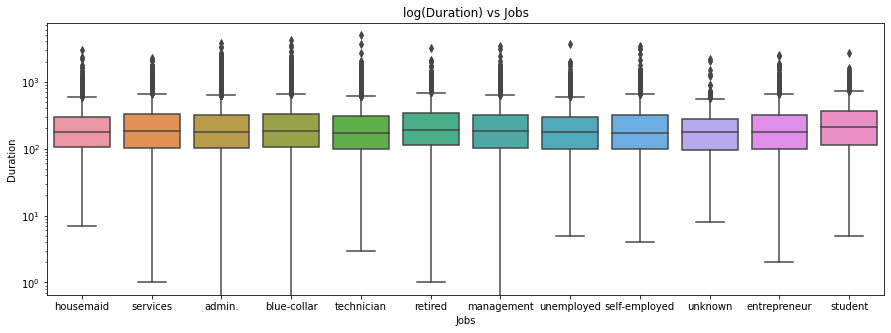

In [25]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "job", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Jobs")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Jobs")

Text(0.5, 1.0, 'log(Duration) vs Education')

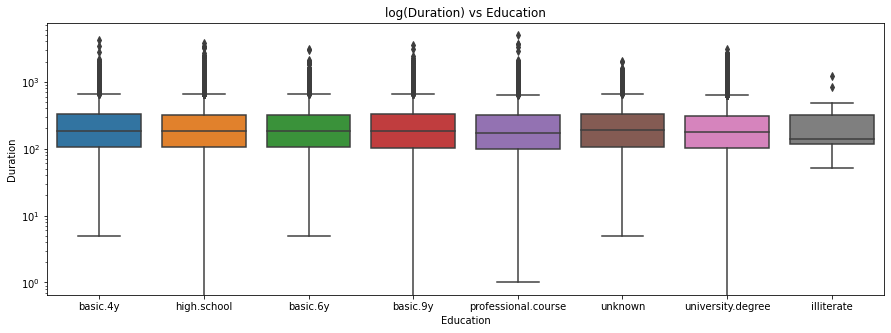

In [26]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "education", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Education")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Education")

In [27]:
#Categorical Treatment-
print("Jobs: \n", df["job"].unique(),'\n')
print("Marital Status: \n", df['marital'].unique(),'\n')
print("Education: \n", df['education'].unique(),'\n')
print("Default on Credit: \n", df['default'].unique(),'\n')
print("Housing loan: \n", df['housing'].unique(),'\n')
print("Loan default: \n", df['loan'].unique(),'\n')
print("Contact type: \n", df['contact'].unique(),'\n')
print("Months: \n", df['month'].unique(),'\n')
print("day_of_week: \n", df['day_of_week'].unique(),'\n')
print("Poutcome: \n",df["poutcome"].unique(),'\n')

Jobs: 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Marital Status: 
 ['married' 'single' 'divorced' 'unknown'] 

Education: 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Default on Credit: 
 ['no' 'unknown' 'yes'] 

Housing loan: 
 ['no' 'yes' 'unknown'] 

Loan default: 
 ['no' 'yes' 'unknown'] 

Contact type: 
 ['telephone' 'cellular'] 

Months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week: 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

Poutcome: 
 ['nonexistent' 'failure' 'success'] 

